**Fabio Zanarello**   
March 2020  
Sanger Institute, Cambridge

## Cell Model Passport: images exploratory analysis 

Here you will find the exploratory analysis of microscope images of some lines from the Cell Model Passport (CMP).   
Follow each cell of this notebook to:
1. Convert from .tiff to .jpg
2. Organize images based on a selected features
3. Classes overview
4. Visualize images and retrieve information


To explore the notebook use:

1. Basic navigation: `enter`, `shift-enter`, `up/k`, `down/j`
2. Saving the notebook: `s`
2. Change Cell types: `y`, `m`, `1-6`, `t`
3. Cell creation: `a`, `b`
4. Cell editing: `x`, `c`, `v`, `d`, `z`
5. Kernel operations: `i`, `0` (press twice)

To learn more click [here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html).

### Libraries    

In [1]:
import os

from CMP_functions.preprocessing import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

Assign to...
- `PATH_data` the folder where you store your data
- `PATH_img` the **images folder** (should be in `data/`)
- `PATH_info` a **.csv** table containing images name and relative features (first column **im_id**)

**EXAMPLE of images_info.csv** 

| **im_id**     | SIDM          | tissue                      |...|Feature_n|
| ------------- |:-------------:| ---------------------------:|---|---------|
| 1877-8278     | SIDM00423     | Haematopoietic and Lymphoid |...|NA|
| 1476-8001     | SIDM01081     | Head and Neck               |...|NA|
| 2195-8403     | SIDM00585     | Liver                       |...|NA|


 


In [2]:
PATH_data = "test_data/"
PATH_img = "test_data/img_tif/"
PATH_info = "test_data/images_info_table.csv"

To test everything is working, run the cells below, check filenames and table header.

In [3]:
im_names = list_files(PATH_img)

.DS_Store
1004-8228.tif
151-8407.tif
1008-8405.tif
151-8415.tif
151-8408.tif
1002-8019.tif
1000-7807.tif
1003-9239.tif


In [4]:
im_info = pd.read_csv(PATH_info) 
im_info.head()

,im_id,master_id,model_name,synonyms,model_type,growth_properties,doi,pmed,model_treatment,model_comments,...,ethnicity,smoking_status,model_relations_comment,COSMIC_ID,BROAD_ID,CCLE_ID,RRID,HCMI,suppliers,SIDM
0,1877-8278,1877,SU-DHL-8,NaN,Cell Line,Suspension,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,1331038,ACH-000656,SUDHL8_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_2207,NaN,DSMZ:ACC-573,SIDM00423
1,1476-8001,1476,SCC-4,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,910904,ACH-000238,SCC4_UPPER_AERODIGESTIVE_TRACT,CVCL_1684,NaN,ATCC:CRL-1624,SIDM01081
2,1068-8758,1068,PCI-4B,PCI-04B;PCI-4M,Cell Line,Unknown,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,1298531,ACH-002297,PCI4B_UPPER_AERODIGESTIVE_TRACT,CVCL_C171,NaN,Unknown:Unknown,SIDM00043
3,2195-8403,2195,HuH-7,JTC-39,Cell Line,Unknown,NaN,NaN,NaN,NaN,...,East Asian,Unknown,NaN,907071,ACH-000480,HUH7_LIVER,CVCL_0336,NaN,JCRB:JCRB0403,SIDM00585
4,162,162,DOK,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,White,Unknown,NaN,910936,ACH-002234,DOK_UPPER_AERODIGESTIVE_TRACT,CVCL_1180,NaN,ECACC:94122104,SIDM00540


Last step is to check for consistency between name of images and table info.

In [5]:
consistent, missing_file, missing_info = check_consistency(im_names, im_info)


Found 8 consistent file and info out of 9 images and 736 info
728 missing file found
1 missing info found


If you found missing files or info you can check their names:

In [6]:
missing_file

['1877-8278',
 '1476-8001',
 '1068-8758',
 '2195-8403',
 '162',
 '924-8045',
 '329-8251',
 '1145',
 '101-8426',
 '405-8561',
 '2120-8790',
 '476-9674',
 '2154-7817',
 '946-8005',
 '694-8785',
 '566',
 '1525-8421',
 '1391-8395',
 '770',
 '2084-9114',
 '1909-8457',
 '1320-8024',
 '2078-8749',
 '1270-7836',
 '1606-8748',
 '575-9104',
 '960-8354',
 '858-8360',
 '298 (2)',
 '774-9562',
 '1450-8998',
 '1756',
 '917-8976',
 '2120-8791',
 '476-9675',
 '1238-8250',
 '769-8731',
 '177',
 '605',
 '2108-8594',
 '770 (2)',
 '2152-8229',
 '34-8314',
 '38-8945',
 '2094 (2)',
 '1539-8584',
 '2101-8465',
 '1481-8379',
 '607',
 '329-8252',
 '2062-9569',
 '449-8385',
 '2263-8013',
 '896-7831',
 '697 (2)',
 '861-9568',
 '363',
 '337-8358',
 '1768',
 '1484-9119',
 '1315-8227',
 '703-7799',
 '217',
 '173-8566',
 '1009-8562',
 '2143-8738',
 '1391-8396',
 '1764-8996',
 '1191-7819',
 '1942-8771',
 '369-8439',
 '1749-8568',
 '914-8463',
 '799',
 '2062',
 '1465-8033',
 '774-9561',
 '1972-8778',
 '577 (2)',
 '585

In [7]:
missing_info

['']

## 1. From .tiff to .jpg

Usalully microscope images are in .tiff format, wich is great in terms of quality but also  heavy. In this notebook we want to load and look at those images as fast as possible, our first step will be to convert them in .jpg.

If you already have .jpg images, just assign .jpg folder path to `PATH_jpg` . 

`convert_tif` takes all the .tiff images and creates a folder in `PATH_data` containing converted .jpg. Then return the folder path. 

In [8]:
PATH_jpg = convert_tif(PATH_img, PATH_data)

Directory  test_data/img_jpg/  already exists
Converted 8 images and saved at test_data/img_jpg/ 


## 2. Organize images based on feature 

In order to organize better the images, a good strategy is to split them in sub-folder describing a given feature.

In [9]:
#Subset the im_info in order to have only conistend image names
im_info = im_info[im_info['im_id'].isin(consistent)]

In [10]:
#Select the feature you want to split on (must be in im_info.columns)
feature = 'tissue'

In [11]:
#extract features classes (last argument is minumn number of observatios per class)
class_count, class_list = get_classes(im_info, feature, 1)

#Generate a dictionary of image name to class
name_to_class = dict(zip(im_info['im_id'], im_info[feature]))

In [12]:
#create feature directory and classes sub-dirs
create_class_folders(class_list, feature, PATH_data)

Directory tissue already exists
Sub-directory Large Intestine already exists
Sub-directory Haematopoietic and Lymphoid already exists
Sub-directory Soft Tissue already exists
Sub-directory Breast already exists
Sub-directory Skin already exists


In [13]:
#link images to class sun-dir 
link_images(PATH_jpg, name_to_class, PATH_data+feature)

Link already exists
Link already exists
Link already exists
Link already exists
Link already exists
Link already exists
Link already exists
Link already exists
Images linked to feature folders


## 3. Classes overview

`get_overview` gives summary statistic about the chosen feature and plot the distribution of each class. I you want to explore other feature go back and repeat step 2.

8 images are subdividen in 5 tissue

Large Intestine: 3
Haematopoietic and Lymphoid: 2
Soft Tissue: 1
Breast: 1
Skin: 1


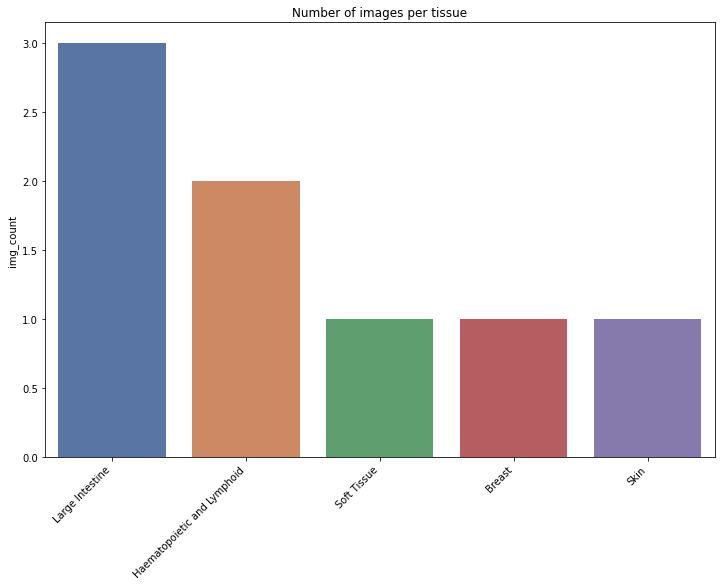

In [14]:
ft_plot = get_overview(feature, class_count)

**If you want to save this figure, uncomment the cell below**

In [15]:
#save_fig(ft_plot, PATH_data, feature)

## 4. Visualize images and retrieve information

Use `view_image` function to display images and retrieve information. You just have to specify:
- class (es. 'Haematopoietic and Lymphoid') 
- feature (es. 'tissue')
- im_info (table containing all images features)
- n (number of images to display, 'a' to display all)
- path_jpg 

Examples are given below.

In [16]:
#check for available feature
print ('Available features:\n',list(im_info.columns))

Available features:
 ['im_id', 'master_id', 'model_name', 'synonyms', 'model_type', 'growth_properties', 'doi', 'pmed', 'model_treatment', 'model_comments', 'msi_status', 'mutational_burden', 'ploidy', 'parent_id', 'mutation_data', 'methylation_data', 'expression_data', 'cnv_data', 'crispr_ko_data', 'fusion_data', 'drug_data', 'sample_id', 'tissue', 'tissue_status', 'cancer_type', 'cancer_type_detail', 'cancer_type_ncit_id', 'age_at_sampling', 'sampling_day', 'sampling_month', 'sampling_year', 'sample_treatment', 'sample_treatment_details', 'sample_site', 'tnm_t', 'tnm_n', 'tnm_m', 'tnm_integrated', 'tumour_grade', 'patient_id', 'species', 'gender', 'ethnicity', 'smoking_status', 'model_relations_comment', 'COSMIC_ID', 'BROAD_ID', 'CCLE_ID', 'RRID', 'HCMI', 'suppliers', 'SIDM']


### View all skin cell models

In [17]:
#check the class available for the feature of interest
print ('Available classes:\n',set(list(im_info['tissue'])))

Available classes:
 {'Skin', 'Haematopoietic and Lymphoid', 'Large Intestine', 'Breast', 'Soft Tissue'}


YOU ARE LOOKIG AT:
Image name: 1003-9239
Tissue: Haematopoietic and Lymphoid
Cancer type:Plasma Cell Myeloma
Model name: SK-MM-2

FOR MORE INFO CHCK:
https://cellmodelpassports.sanger.ac.uk/passports/SIDM00391


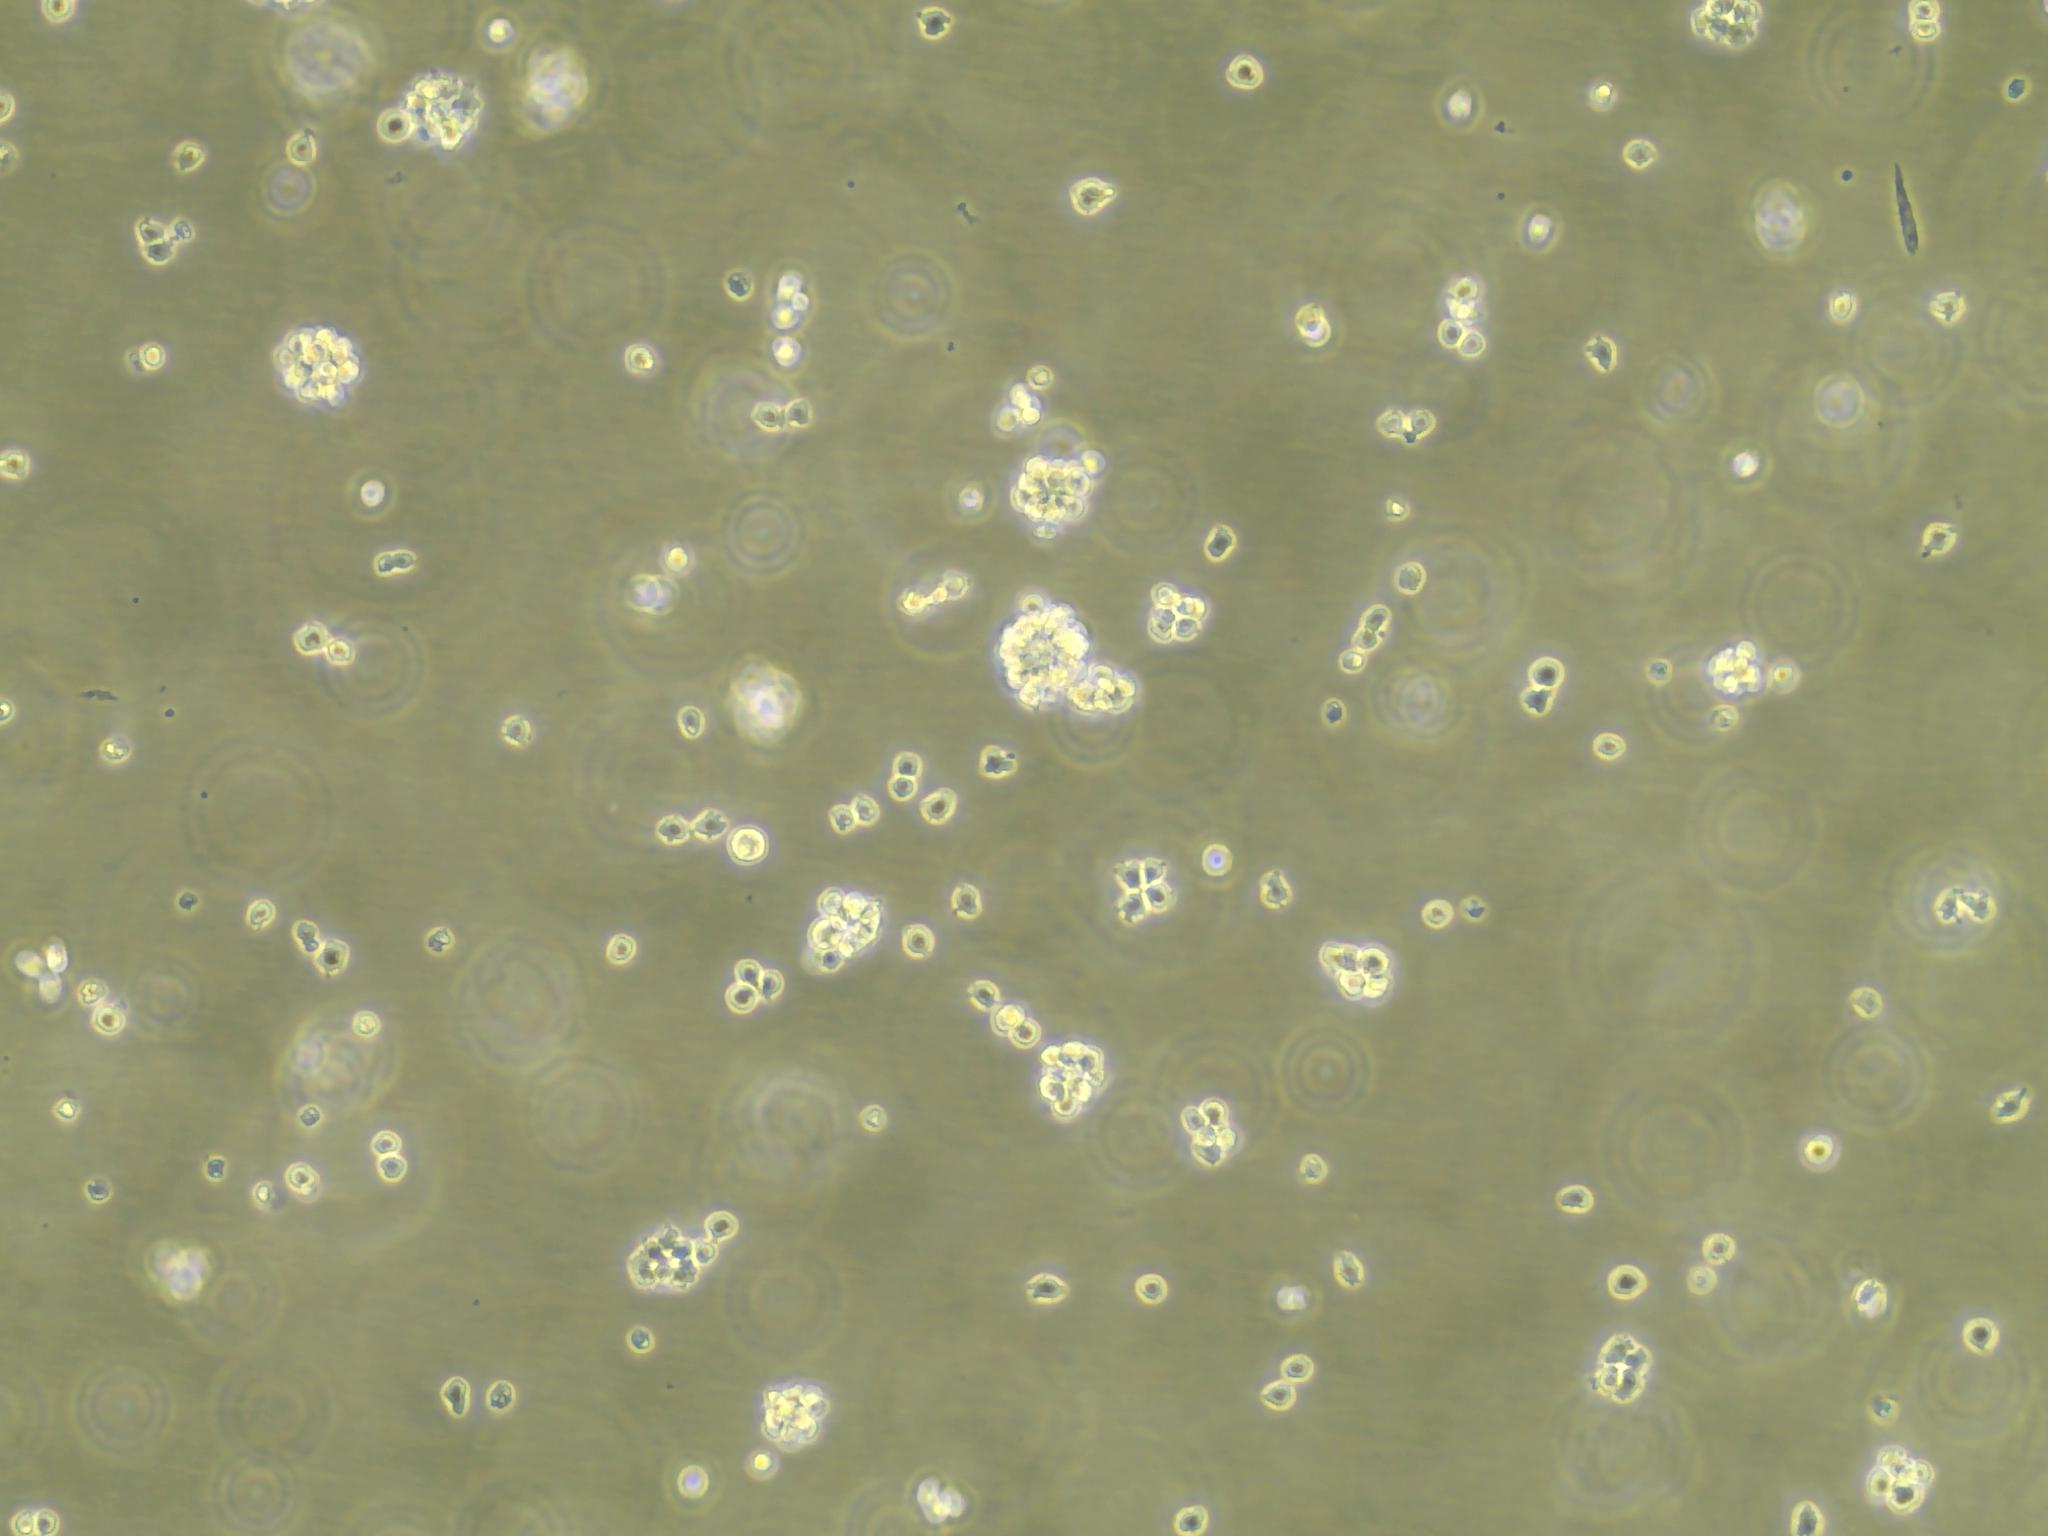

YOU ARE LOOKIG AT:
Image name: 1008-8405
Tissue: Haematopoietic and Lymphoid
Cancer type:Burkitt's Lymphoma
Model name: GA-10

FOR MORE INFO CHCK:
https://cellmodelpassports.sanger.ac.uk/passports/SIDM00854


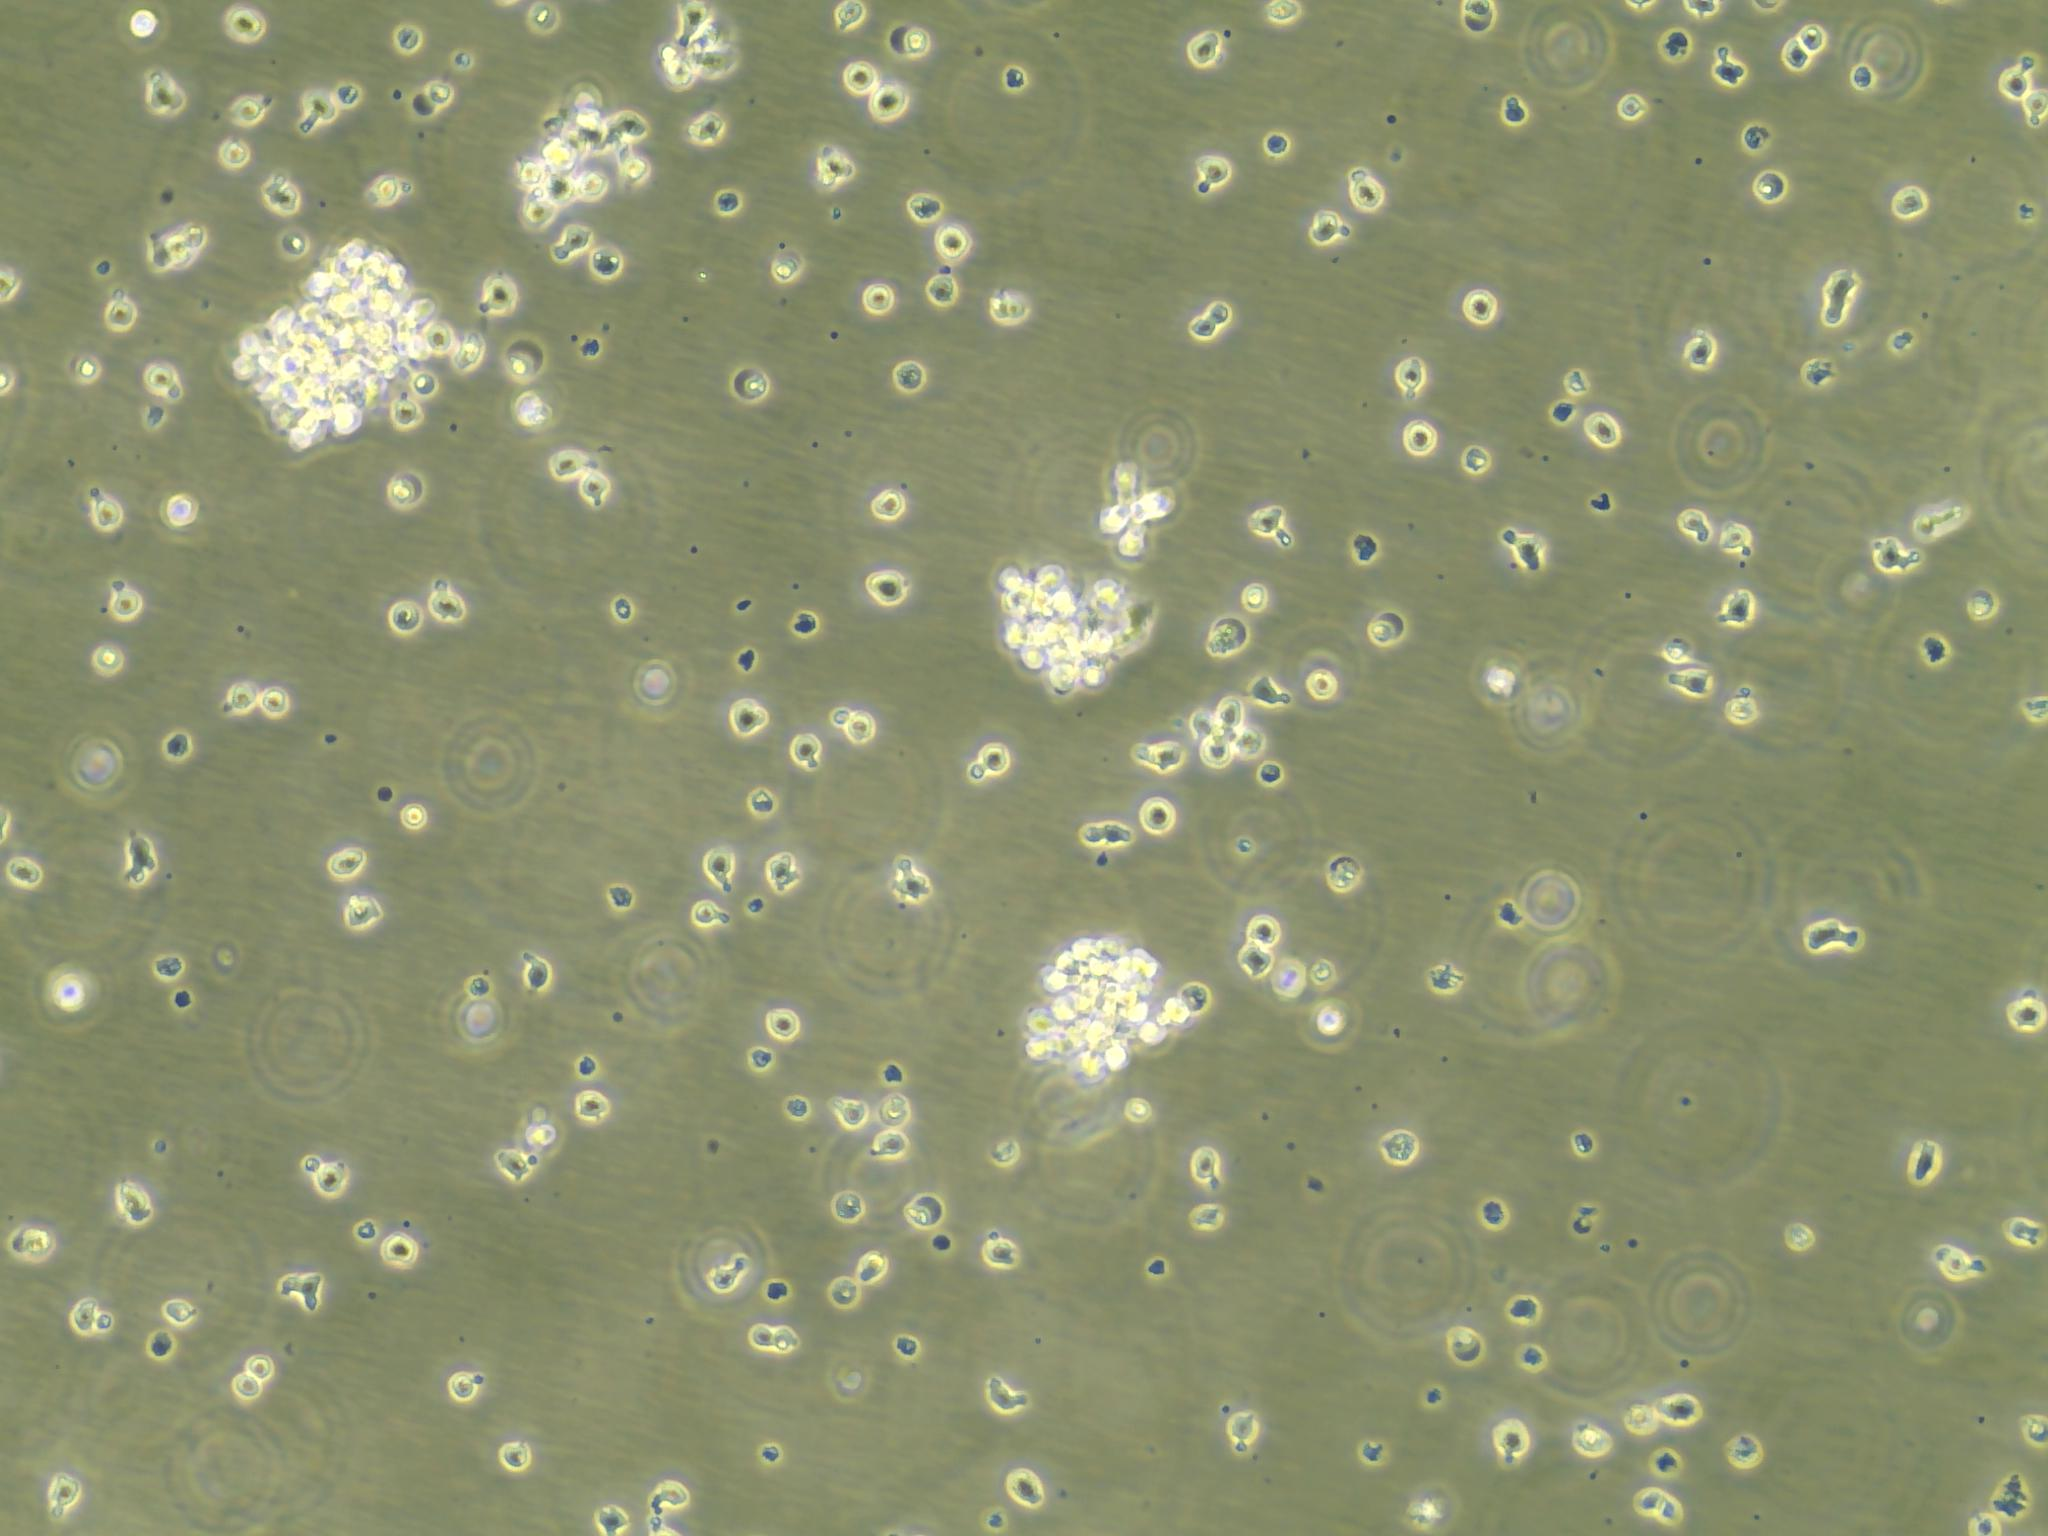

In [18]:
#this function displays 2 pictures of your class of interest 
view_image('Haematopoietic and Lymphoid', 'tissue', im_info, 2, PATH_jpg)

### View image from SNU-61 model

In [19]:
#check the class available for the feature of interest
print ('Available class:\n',set(list(im_info['model_name'])))

Available class:
 {'SNU-61', 'GA-10', 'OCUB-M', 'SK-MM-2', 'VA-ES-BJ', 'WM-115'}


YOU ARE LOOKIG AT:
Image name: 151-8407
Tissue: Large Intestine
Cancer type:Colorectal Carcinoma
Model name: SNU-61

FOR MORE INFO CHCK:
https://cellmodelpassports.sanger.ac.uk/passports/SIDM00194


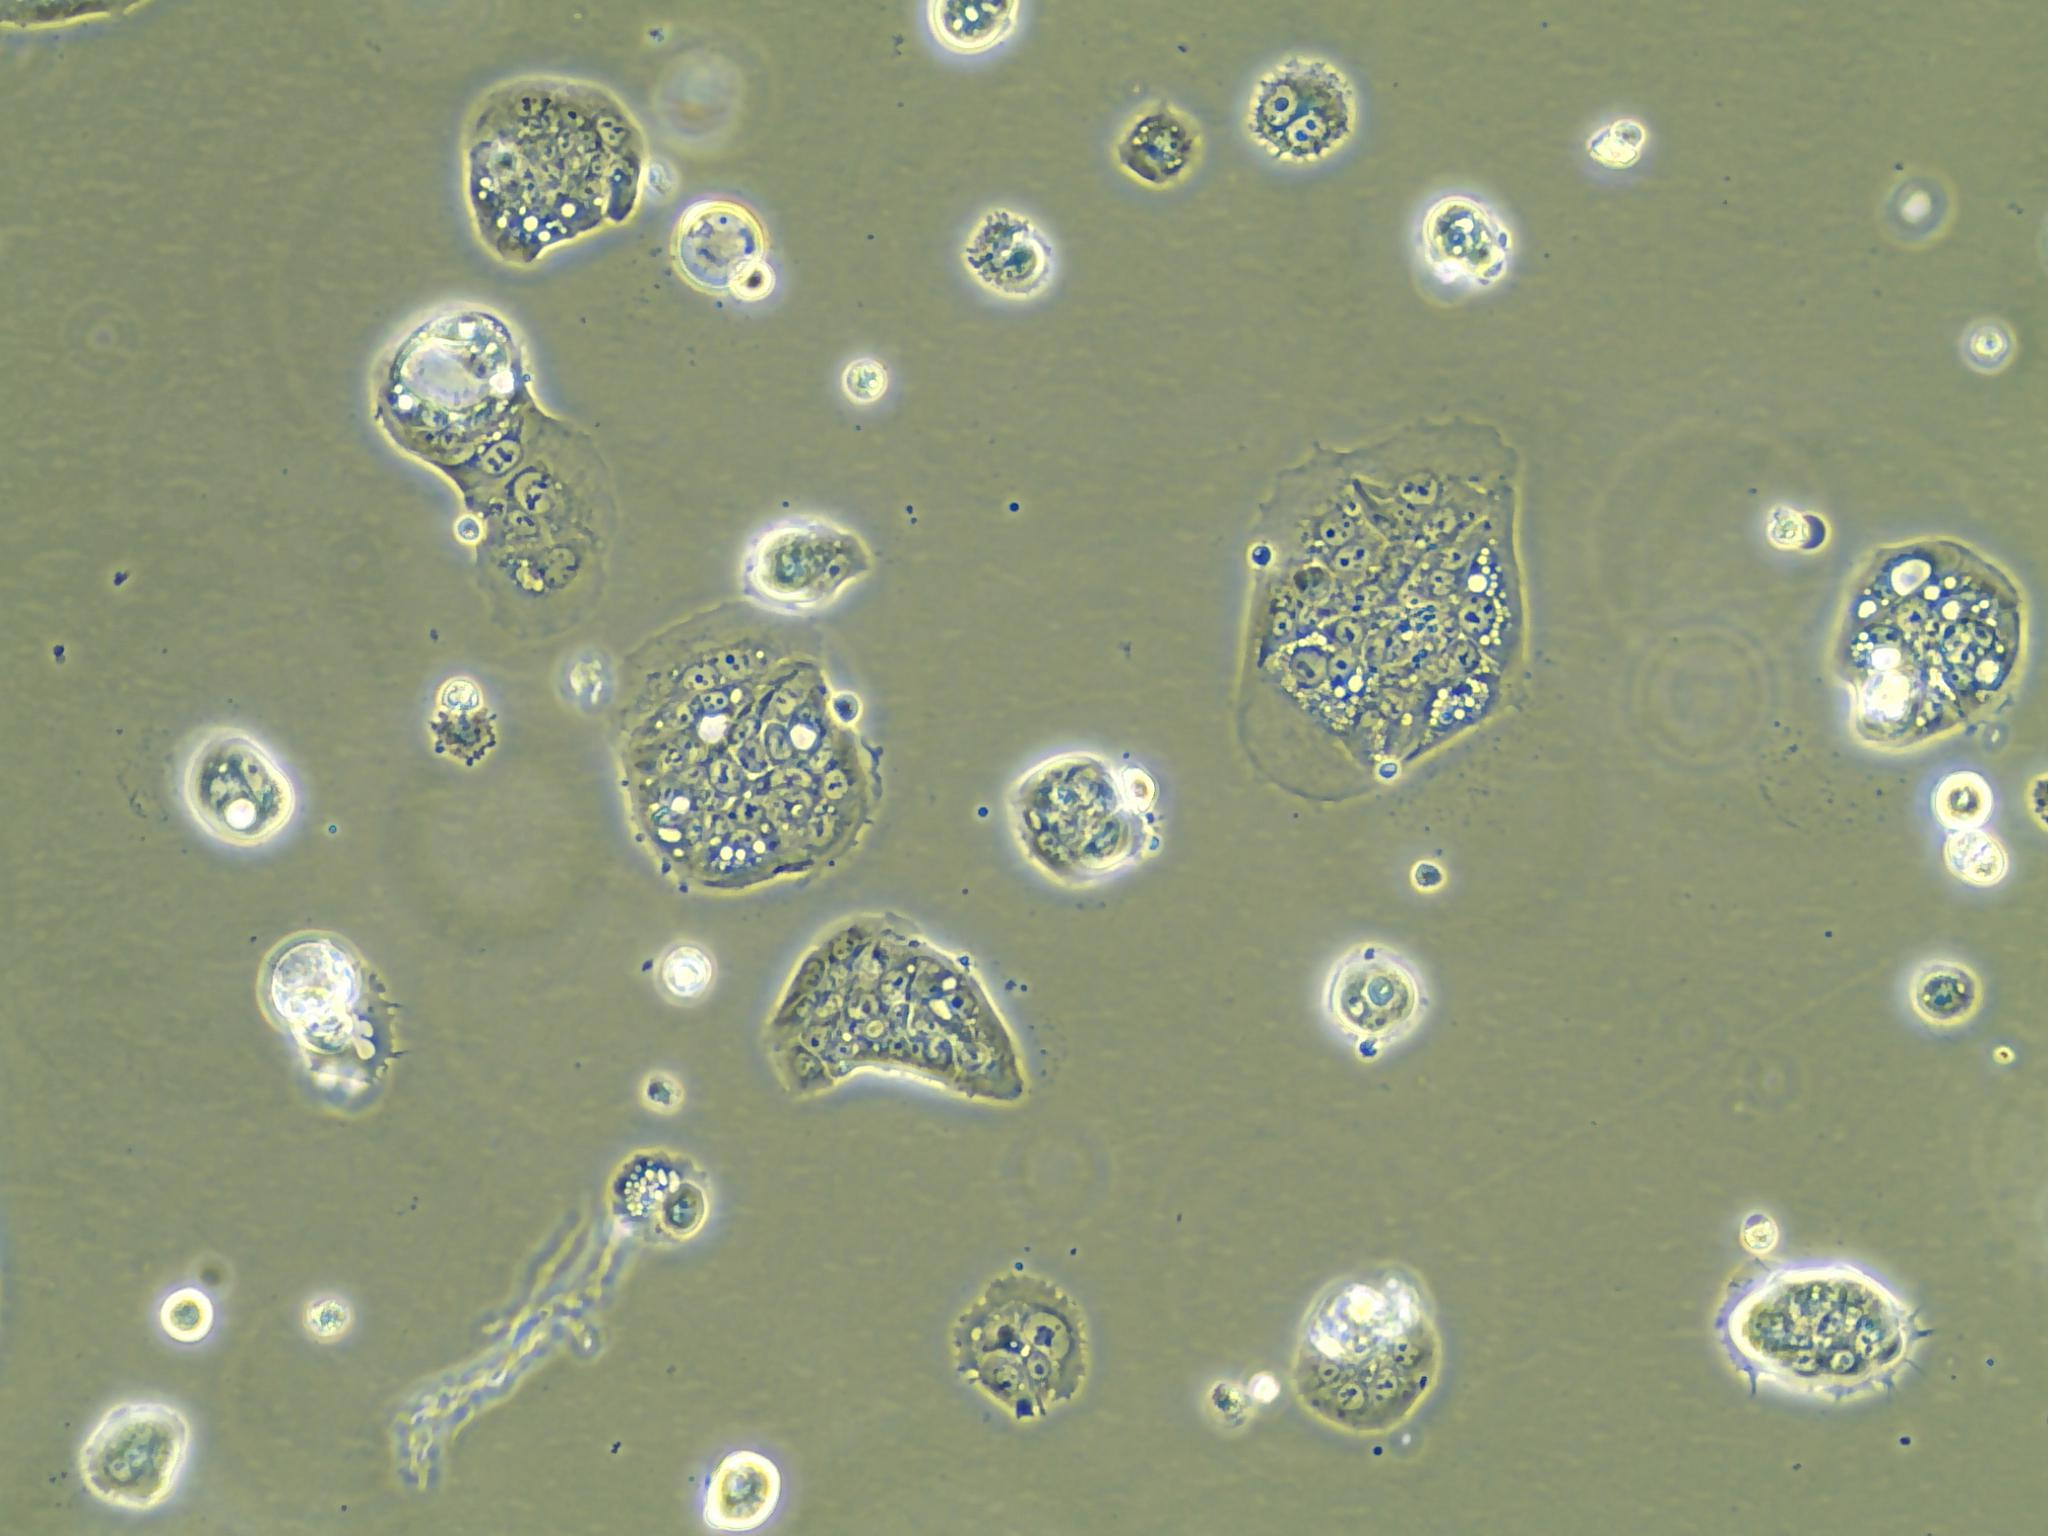

In [20]:
view_image('SNU-61', 'model_name', im_info, 1, PATH_jpg)